# 2021-07-07 practice

In [1]:
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
import matplotlib.cm as cm

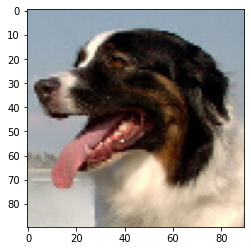

In [2]:
example_file=("http://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png")
image=imread(example_file)
plt.imshow(image)
plt.show()

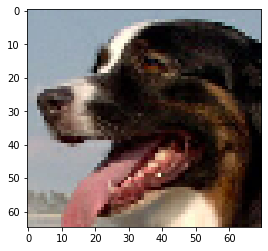

In [3]:
image2=image[5:70,0:70]
plt.imshow(image2,cmap=cm.gray)
plt.show()

data type : <class 'numpy.ndarray'>,shape:(30, 30, 3)


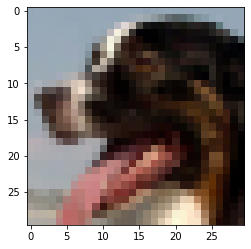

In [6]:
image3=resize(image2,(30,30),mode='symmetric')
plt.imshow(image3,cmap=cm.gray)
print("data type : %s,shape:%s"%(type(image3),image3.shape))

### tabular data from the web

In [30]:
import pandas as pd
import numpy as np

table_PA=pd.read_html('https://en.wikipedia.org/wiki/Politics _of_Pennsylvania')

InvalidURL: URL can't contain control characters. '/wiki/Politics _of_Pennsylvania' (found at least ' ')

In [5]:
df=table_PA[0]
df.head()

,0,1
0,NaN,This article needs additional citations for ve...


In [3]:
df['Democratic']=df['Democratic'].str[:4]

KeyError: 'Democratic'

In [22]:
import newspaper
from newspaper import Article

article=Article("https://www.3gpp.org/news-events/2143-3gpp-meets-imt-2020")
article.download()
article.parse()
print(article.text)

November 28, 2020

Earlier this week the ITU issued a press release to publicise the move to the approval process - by the 193 member states of the Union - of their ITU-R Recommendation: 'Detailed specifications of the radio interfaces of IMT-2020.' (ITU-R M.[IMT-2020.SPECS]).

The document - due for publication in February 2021 - will be the end product of a long process, initiated in 2012, under the banner 'IMT for 2020 and beyond' where the ITU set out its agenda for a steady progression of 5G research activities that would nourish the 3GPP efforts on the new radio and 5G core specification work.

The ITU press release formally announces the radio interfaces that conform with the International Mobile Telecommunications 2020 (IMT-2020) performance requirements:

"The technologies are: 3GPP 5G-SRIT and 3GPP 5G-RIT submitted by the Third Generation Partnership Project (3GPP), and 5Gi submitted by Telecommunications Standards Development Society India (TSDSI). During the multi-year deve

In [23]:
article.title

'3GPP meets IMT-2020'

In [24]:
article.authors

['Kevin Flynn']

In [25]:
import newspaper
site=newspaper.build("https://techcrunch.com/")
site.article_urls()

[]

In [26]:
site_article=site.articles[0]
site_article.download()
site_article.parse()
site_article.title
site_article.url

IndexError: list index out of range

In [19]:
allarticles=[]
for i in range(len(site.article_urls())):
    article=Article(site.article_urls()[i])
    article.download()
    article.parse()
    allarticles.append(article)

In [20]:
import pandas as pd
df=pd.DataFrame(columns=['Title','Authors','PubDate','URL','Text'])

In [21]:
for i in range(len(allarticles)):
    row=dict(zip(['Title','Authors','PubDate','URL','Text'],[allarticles[i].title,allarticles[i].authors,allarticles[i].public_date,allarticles[i].urls,allarticles[i].text]))
    row_s=pd.Series(row)
    row_s.name=i
    df=df.append(row_s)
df

,Title,Authors,PubDate,URL,Text


In [3]:
import urllib.request as ure
from bs4 import BeautifulSoup as bs

In [4]:
news='https://www.forbes.com/'
soup=bs(ure.urlopen(news).read(),'html.parser')

In [5]:
soup.find_all('a',{"class":"happening__title"})

[<a class="happening__title" data-ga-track="Breaking Article 1" href="https://www.forbes.com/sites/graisondangor/2021/07/06/us-says-thousands-of-yemenis-cant-be-deported-from-us-5th-group-protected-this-year/">U.S. Says Thousands Of Yemenis Can’t Be Deported From U.S.—5th Group Protected This Year</a>,
 <a class="happening__title" data-ga-track="Breaking Article 2" href="https://www.forbes.com/sites/joewalsh/2021/07/06/adams-wins-nyc-mayoral-primary-by-just-1-point-ap-says/">Adams Wins NYC Mayoral Primary By Just 1 Point, AP Says</a>,
 <a class="happening__title" data-ga-track="Breaking Article 3" href="https://www.forbes.com/sites/nicholasreimann/2021/07/06/black-louisiana-lawmakers-request-federal-probe-into-state-police-after-black-man-dies-in-custody/">Black Louisiana Lawmakers Request Federal Probe Into State Police After Black Man Dies In Custody</a>,
 <a class="happening__title" data-ga-track="Breaking Article 4" href="https://www.forbes.com/sites/joewalsh/2021/07/06/rnc-denies-

In [6]:
for i in soup.find_all('a',{"class":"happening__title"}):
    print(i.text)

U.S. Says Thousands Of Yemenis Can’t Be Deported From U.S.—5th Group Protected This Year
Adams Wins NYC Mayoral Primary By Just 1 Point, AP Says
Black Louisiana Lawmakers Request Federal Probe Into State Police After Black Man Dies In Custody
RNC Denies Russian Government Hacked Its Computers
McConnell Vows To ‘Make It Hard’ For Democrats To Pass Reconciliation Bill
Miami Condo Collapse: Death Toll Rises To 36 As Search Resumes After Building Demolition
Cuomo Declares Disaster Emergency On Gun Violence, Labeling It A ‘New Epidemic’
Maryland Says 100% Of June Covid Deaths Were Among The Unvaccinated, As Early Data Shows Similar Trend Nationally
Medicare Would Save $2.6 Billion Buying Some Generic Drugs At Costco Prices, Researchers Find
Hundreds Likely Dead After Historic Heat Wave Hits Pacific Northwest And Canada
White House Says U.S. Not ‘On Track’ For New Covid Restrictions As Delta Variant Spreads
Ex-Surgeon General: People ‘Are Dying’ Because FDA Hasn’t Fully Approved A Covid-19 V

In [7]:
for i in soup.find_all('a',{"class":"happening__title"}):
    print(i.get('href'))

https://www.forbes.com/sites/graisondangor/2021/07/06/us-says-thousands-of-yemenis-cant-be-deported-from-us-5th-group-protected-this-year/
https://www.forbes.com/sites/joewalsh/2021/07/06/adams-wins-nyc-mayoral-primary-by-just-1-point-ap-says/
https://www.forbes.com/sites/nicholasreimann/2021/07/06/black-louisiana-lawmakers-request-federal-probe-into-state-police-after-black-man-dies-in-custody/
https://www.forbes.com/sites/joewalsh/2021/07/06/rnc-denies-russian-government-hacked-its-computers/
https://www.forbes.com/sites/andrewsolender/2021/07/06/mcconnell-vows-to-make-it-hard-for-democrats-to-pass-reconciliation-bill/
https://www.forbes.com/sites/nicholasreimann/2021/07/06/miami-condo-collapse-death-toll-rises-to-36-as-search-resumes-after-building-demolition/
https://www.forbes.com/sites/jackbrewster/2021/07/06/cuomo-declares-disaster-emergency-on-gun-violence-labeling-it-a-new-epidemic/
https://www.forbes.com/sites/jemimamcevoy/2021/07/06/maryland-says-100-of-june-covid-deaths-wer

In [8]:
article1="https://www.forbes.com/sites/siladityaray/2021/07/06/us-lawyer-handed-prison-sentence-in-hong-kong-over-scuffle-with-police-during-2019-protests/?sh=ff8d6ab3adea"
soup2=bs(ure.urlopen(article1).read(),'html.parser')

In [9]:
for i in soup2.find_all('p'):
    print(i.text)

A Hong Kong court on Tuesday sentenced an American lawyer to four and a half months in prison for clashing with a plainclothes police officer during the 2019 pro-democracy protests in the city, a move that comes at a time when several foreign workers are considering leaving the financial hub following Beijing’s crackdown on all forms of dissent in the city.
Riot police secure the area outside the Tung Chung MTR station on September 7, 2019 in Hong Kong, ... [+] China. 
Samuel Bickett, a 37-year old former Bank of America Merrill Lynch employee, was charged with assaulting a police officer and was handed a jail term of four months and two weeks, Bloomberg reported.
The judge who handed out the ruling described Bickett’s actions as a “serious threat to public order.”
Bickett had been found guilty on the assault charge last month and was denied bail.
The lawyer had pleaded not guilty last month and had accused the off-duty officer of needlessly brandishing his baton at him.
The police off

In [10]:
happening=soup.find_all('a',{"class":"happening__title"})

In [13]:
rows=[]
for i in range(len(happening)):
    happeningtitle=happening[i].text
    happeningurl=happening[i].get('href')
    soup2=bs(ure.urlopen(happeningurl).read(),'html.parser')
    txt=""
    for j in soup2.find_all('p'):
        txt=txt+j.text
    rows.append({'Title':happeningtitle,'URL':happeningurl,'Text':txt})

In [15]:
import pandas as pd
df= pd.DataFrame(rows,columns=['Title','URL','Text'])
df

,Title,URL,Text
0,U.S. Says Thousands Of Yemenis Can’t Be Deport...,https://www.forbes.com/sites/graisondangor/202...,"Nearly 2,200 people from Yemen in the U.S. can..."
1,Adams Wins NYC Mayoral Primary By Just 1 Point...,https://www.forbes.com/sites/joewalsh/2021/07/...,Eric Adams has defeated Kathryn Garcia by just...
2,Black Louisiana Lawmakers Request Federal Prob...,https://www.forbes.com/sites/nicholasreimann/2...,Lawmakers with the Louisiana Legislative Black...
3,RNC Denies Russian Government Hacked Its Compu...,https://www.forbes.com/sites/joewalsh/2021/07/...,A third-party IT company tied to the Republica...
4,McConnell Vows To ‘Make It Hard’ For Democrats...,https://www.forbes.com/sites/andrewsolender/20...,Senate Minority Leader Mitch McConnell said Tu...
5,Miami Condo Collapse: Death Toll Rises To 36 A...,https://www.forbes.com/sites/nicholasreimann/2...,At least 36 people are now confirmed dead whil...
6,Cuomo Declares Disaster Emergency On Gun Viole...,https://www.forbes.com/sites/jackbrewster/2021...,Just two weeks after his emergency powers agai...
7,Maryland Says 100% Of June Covid Deaths Were A...,https://www.forbes.com/sites/jemimamcevoy/2021...,Every person who died from Covid-19 in Marylan...
8,Medicare Would Save $2.6 Billion Buying Some G...,https://www.forbes.com/sites/graisondangor/202...,Medicare pays billions of dollars more for com...
9,Hundreds Likely Dead After Historic Heat Wave ...,https://www.forbes.com/sites/nicholasreimann/2...,The death toll in Oregon alone is now more tha...
